In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../SF_Police_Reports.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', inplace=True, ascending=False)

focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

**Part 1: Temporal Patterns**

Weekly pattern

C:\Users\Mark\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


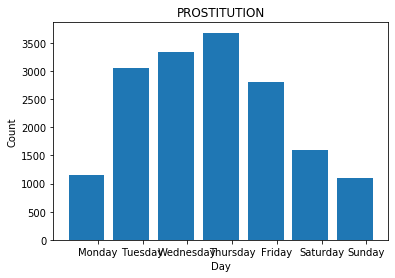

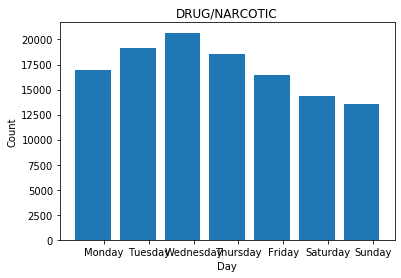

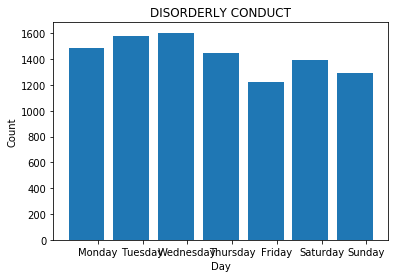

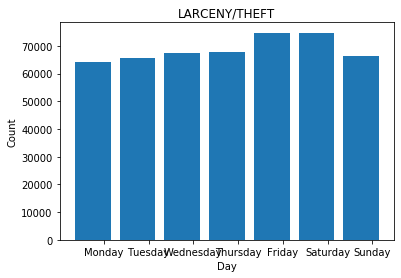

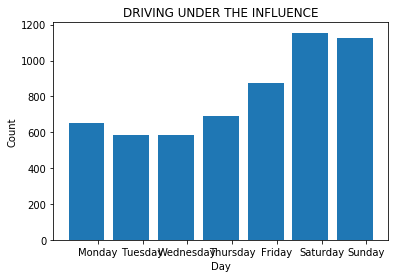

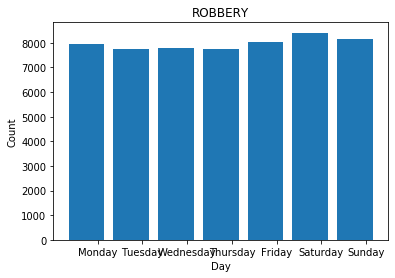

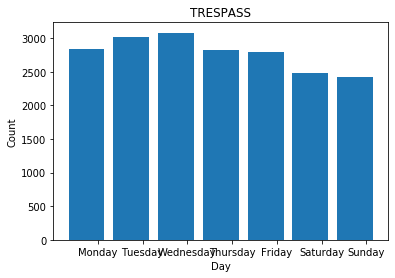

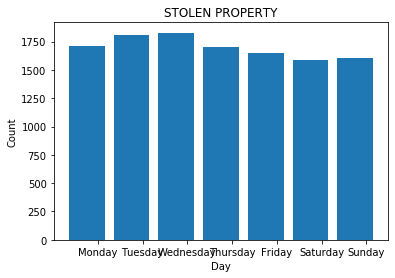

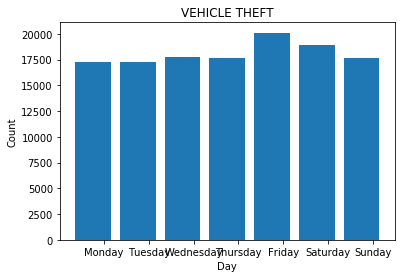

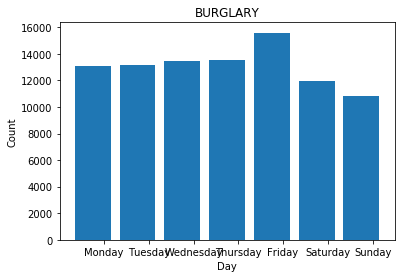

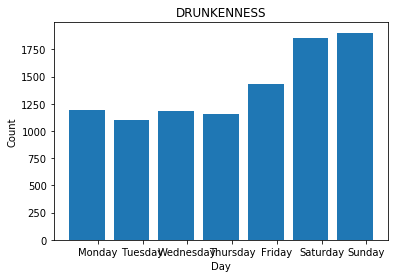

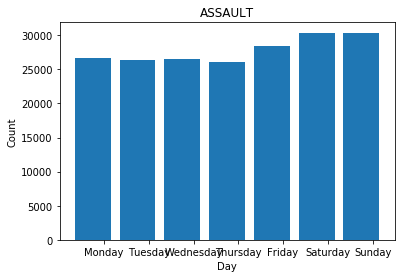

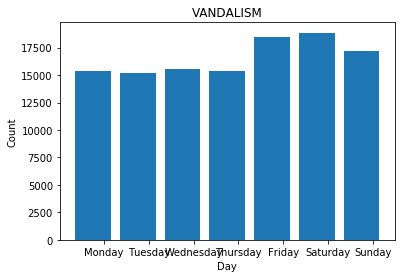

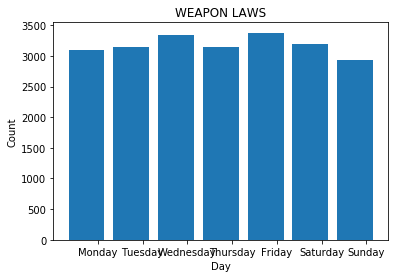

In [4]:
focus_crimes = df[df['Category'].isin(focuscrimes)]
focus_crimes['DayOfWeek'] = pd.Categorical(focus_crimes['DayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

gb = focus_crimes.groupby(['Category', 'DayOfWeek']).size()

for crime in focuscrimes:
    barWidth = 0.25

    bars1 = gb.loc[(gb.index.get_level_values('Category') == crime)].values
    plt.bar(np.arange(len(bars1)),bars1)

    plt.xticks([r + barWidth for r in range(len(bars1))], gb.index.get_level_values('DayOfWeek').unique())
    plt.xlabel('Day')
    plt.ylabel('Count')
    plt.title(crime)
    plt.show()

Monthly Pattern

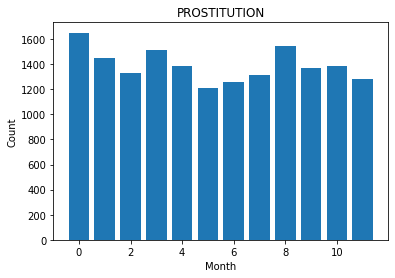

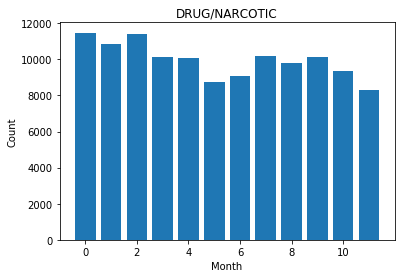

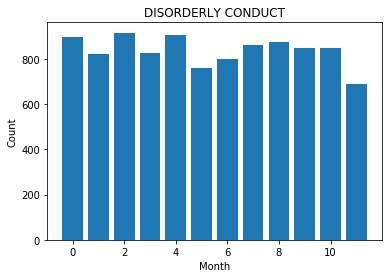

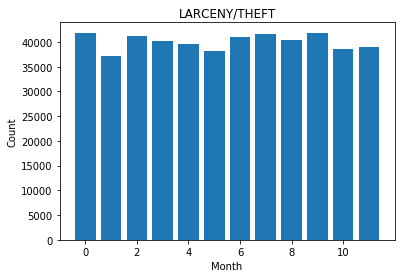

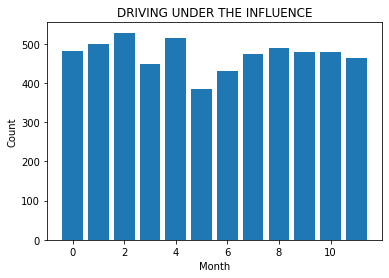

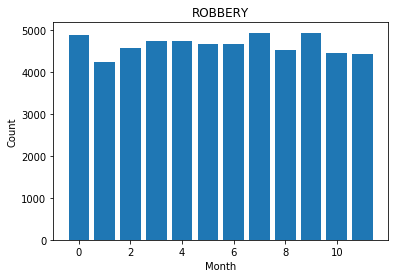

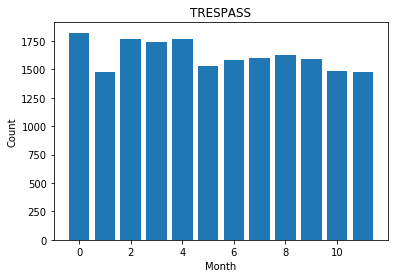

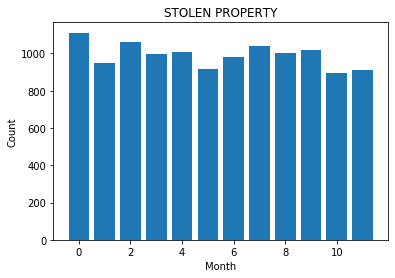

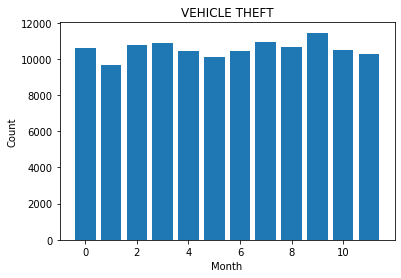

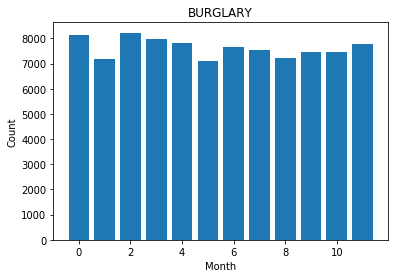

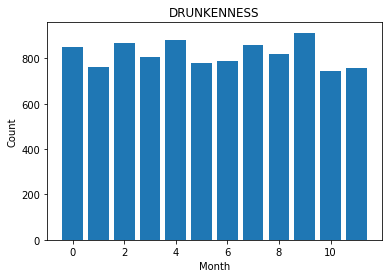

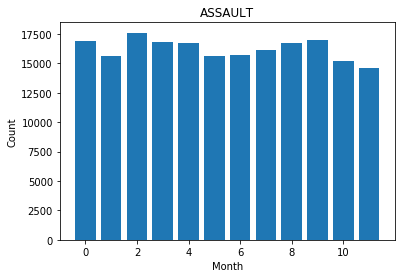

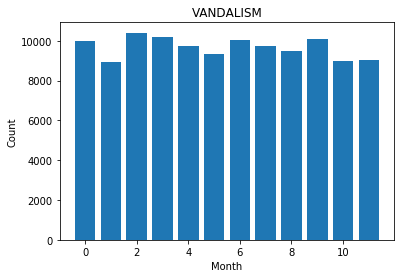

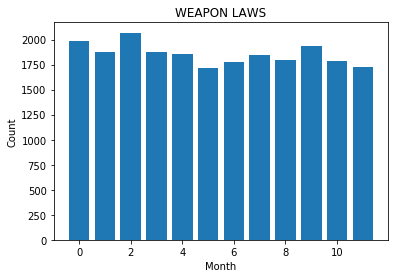

In [5]:
month_crime = focus_crimes.copy().set_index('Date')
gb = month_crime.groupby(['Category', month_crime.index.month]).size()

for crime in focuscrimes:
    barWidth = 0.25

    bars1 = gb.loc[(gb.index.get_level_values('Category') == crime)].values
    plt.bar(np.arange(len(bars1)),bars1)



    #plt.xticks([r + barWidth for r in range(len(bars1))], gb.index.get_level_values('Date').unique())
    plt.xlabel('Month')
    plt.ylabel('Count')
    plt.title(crime)
    plt.show()

24 Hour Pattern

C:\Users\Mark\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


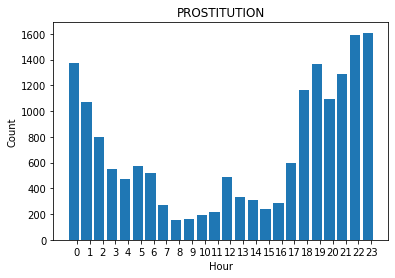

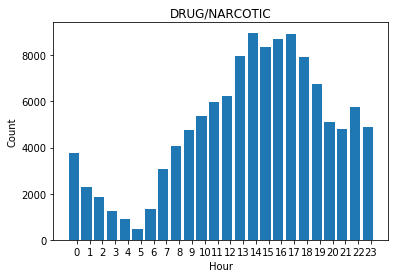

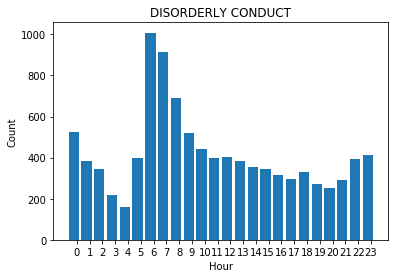

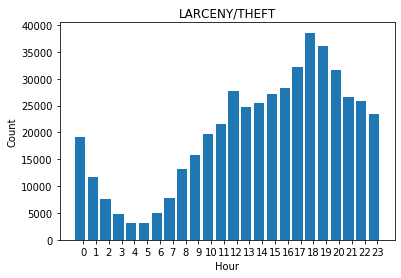

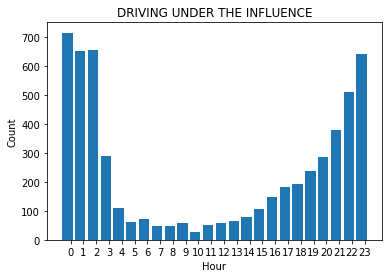

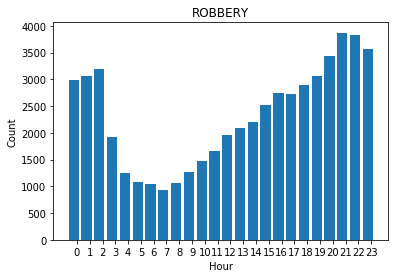

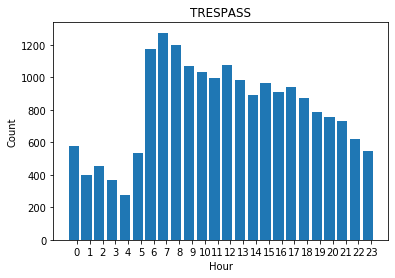

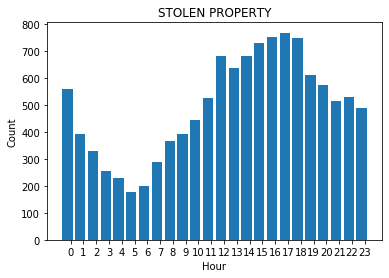

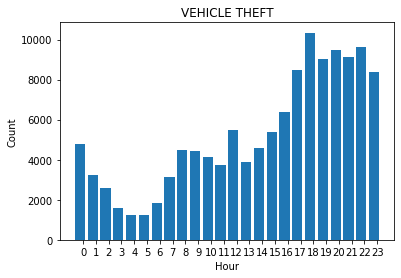

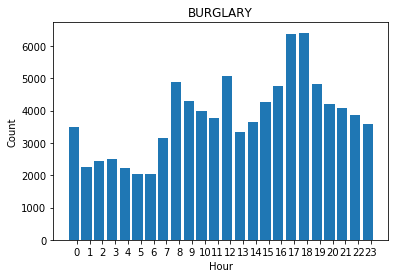

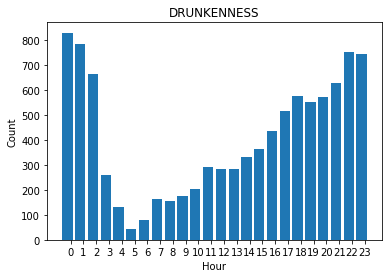

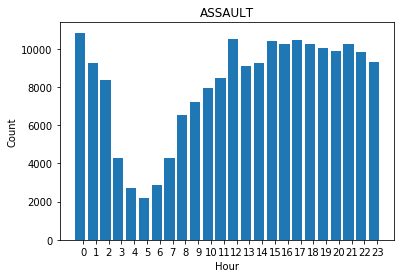

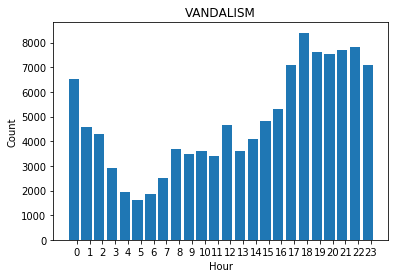

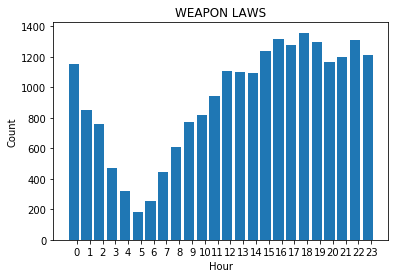

In [6]:
focus_crimes['Time'] = pd.to_datetime(focus_crimes['Time'])
hour_crime = focus_crimes.copy().set_index('Time')
gb = hour_crime.groupby(['Category', hour_crime.index.hour]).size()

for crime in focuscrimes:
    barWidth = 0.25

    bars1 = gb.loc[(gb.index.get_level_values('Category') == crime)].values
    plt.bar(np.arange(len(bars1)),bars1)



    plt.xticks([r + barWidth for r in range(len(bars1))], gb.index.get_level_values('Time').unique())
    plt.xlabel('Hour')
    plt.ylabel('Count')
    plt.title(crime)
    plt.show()

Week Hour Pattern

C:\Users\Mark\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


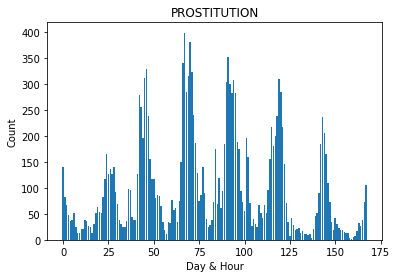

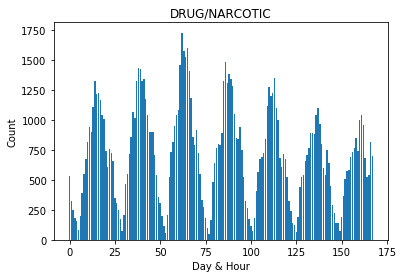

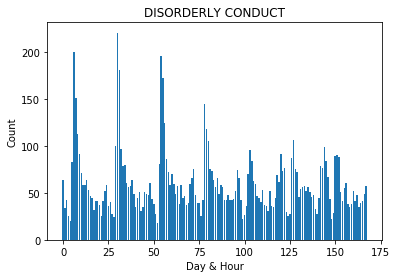

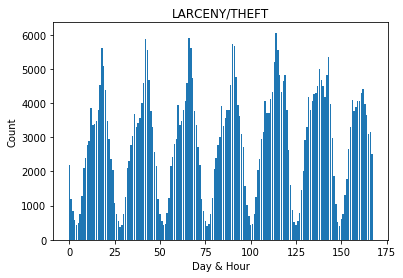

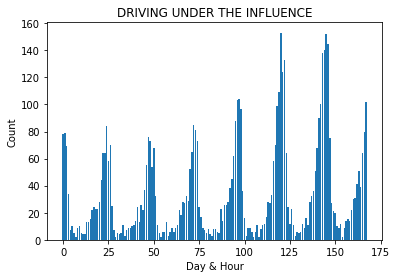

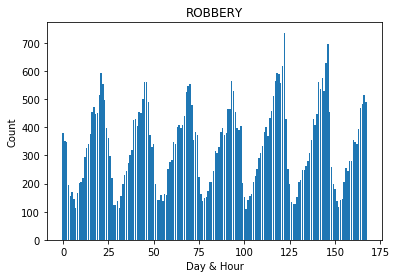

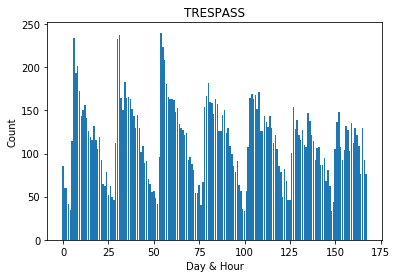

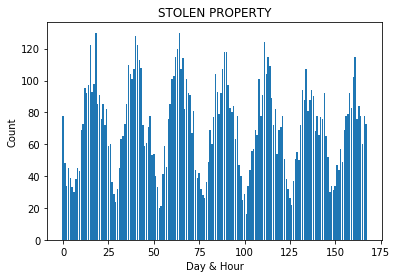

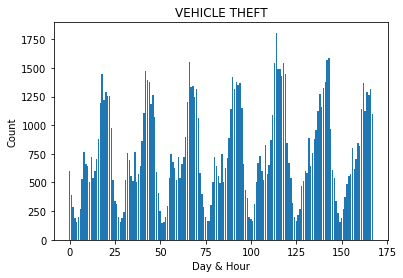

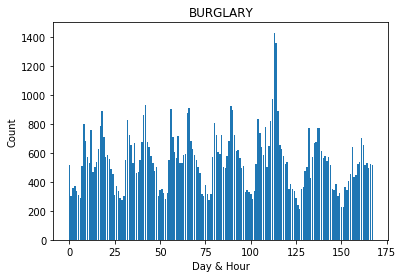

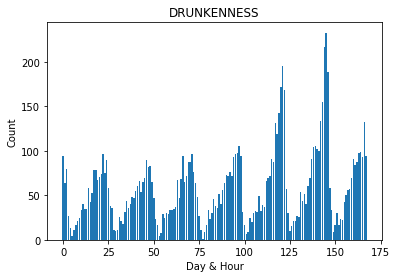

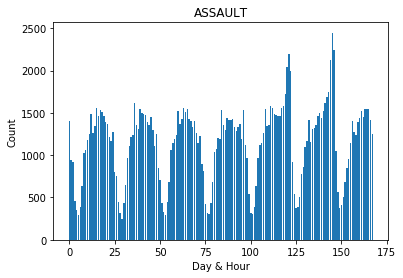

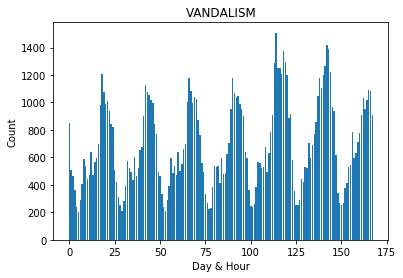

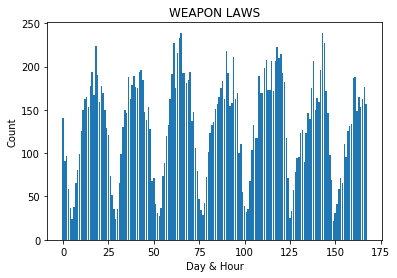

In [7]:
focus_crimes['Time'] = pd.to_datetime(focus_crimes['Time'])
month_crime = focus_crimes.copy().set_index('Time')
gb = month_crime.groupby(['Category','DayOfWeek', month_crime.index.hour]).size()

for crime in focuscrimes:
    barWidth = 0.25

    bars1 = gb.loc[(gb.index.get_level_values('Category') == crime)].values
    plt.bar(np.arange(len(bars1)),bars1)

    #plt.xticks([r + barWidth for r in range(len(bars1))], gb.index.get_level_values('Time').unique())
    plt.xlabel('Day & Hour')
    plt.ylabel('Count')
    plt.title(crime)
    plt.show()

**Part 2: Thinking about data and visualization**

* What is the difference between data and metadata? How does that relate to the bike-example?

Data is the real information that is being recorded, whereas metadata is rather describing the data. Metadata is data about data.

* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that is difficult for the human eye. Explain why your example is difficult.

Comparing visualizations to raw tabled data, the eye has it a lot easier with the visualization as the table can be overwhelming.

* In your own words, explain the difference between exploratory and explanatory data analysis.

Exploratory analysis seeks to find new interesting point to further explore. Explanatory data instead explains the point which has been explored.


**Part 4: Heatmaps of geo-data**

In [16]:
import folium
from folium.plugins import HeatMap
sf = [37.773972,-122.431297]
sf_city_hall = [37.77919, -122.41914]

sf_map = folium.Map(sf, zoom_start=13, tiles='stamentoner')
folium.Marker(sf_city_hall, popup='City Hall').add_to(sf_map)

start_date = pd.to_datetime('2018-02-01')
end_date = pd.to_datetime('2018-04-01')

time_slice = (focus_crimes['Date'] > start_date) & (focus_crimes['Date'] <= end_date)

drugs = focus_crimes[focus_crimes['Category'] == 'DRUG/NARCOTIC'].head()
#Using head as more data crashes my notebook

for index, drug in drugs.iterrows():
    folium.Marker([drug['Y'], drug['X']]).add_to(sf_map)
    


In [12]:
sf_map

In [24]:
sf_map = folium.Map(sf, zoom_start=13, tiles='stamentoner')
heat_df = df[df['Category'] == 'SEX OFFENSES, NON FORCIBLE']
heat_df = heat_df[['Y', 'X']]
heat_data = [[row['Y'], row['X']] for index, row in heat_df.iterrows()]
HeatMap(heat_data).add_to(sf_map)
sf_map

In [50]:
from folium.plugins import HeatMapWithTime
sf_map = folium.Map(sf, zoom_start=13, tiles='stamentoner')

assault_df = focus_crimes[focus_crimes['Category'] == 'ASSAULT']

assault_df.Time = pd.to_datetime(assault_df.Time, format='%H:%M:%S')
assault_df['hour'] = assault_df.Time.apply(lambda x: x.hour)

heattime_data = []
for hour in assault_df.hour.sort_values().unique():
    heattime_data.append(assault_df.loc[assault_df.hour == hour, ['Y', 'X']].groupby(['Y','X']).count().reset_index().values.tolist())

HeatMapWithTime(heattime_data, radius=5, gradient={0.2 : 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}, min_opacity=0.5, max_opacity=0.8, use_local_extrema=True).add_to(sf_map)

sf_map

/home/setero/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Part 5: Errors in the data. The importance of looking at raw (or close to raw) data.**

When the data has been clustered wrongly as in the case of the jitterplot it paints a wrong picture of the frequency and general spread of arrests. As goes for the location of the prostitution arrests which paints a wrong picture of where througout the city arrests occur.